In [1]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import pandas

In [2]:
# hyper parameter
input_size = 1
output_size = 1
epochs = 60
learning_rate = 0.01

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

loss_list = []

#model architecture
model = nn.Linear(1,1)

#define loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

for epoch in range(epochs):
    inputs = torch.tensor(x_train)
    labels = torch.tensor(y_train)
    
    #propagation
    pred = model(inputs)
    loss = criterion(pred,labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        loss_list.append(loss.item())

    
    

[0.16998514533042908, 0.16995330154895782, 0.1699269711971283, 0.1699013113975525, 0.16987623274326324, 0.16985183954238892, 0.16982807219028473, 0.16980493068695068, 0.1697823405265808, 0.16976028680801392, 0.16973885893821716, 0.1697179228067398]


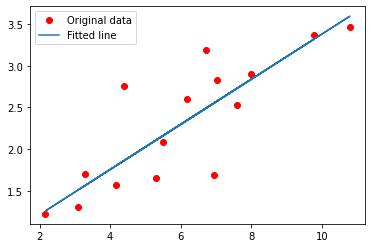

In [3]:
print(loss_list)
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

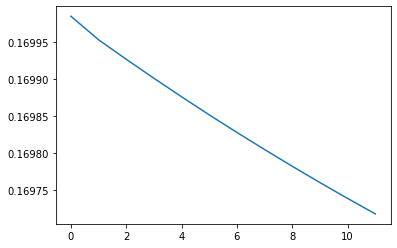

In [4]:
ax = plt.gca()
#predicted = model(torch.from_numpy(x_train)).detach().numpy()
x = range(0,12)
plt.plot(x,loss_list)
plt.show()

In [5]:
# Save the model checkpoint
torch.save(model.state_dict(), 'linear_regression.ckpt')